# Load Forecasting

## 부하 예측을 위한 데이터 수집 및 변환

### 부하 데이터 프로세싱

In [35]:
import pandas as pd

### 부하 데이터 불러오기

In [36]:
raw_gen_data = pd.read_excel('1.Data/raw_generation_data.xlsx')
raw_gen_data.head()

,Date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,62446,59691,57231,55500,54821,55000,55641,56212,55816,...,52206,52503,53553,55466,58560,60360,60588,60408,60333,61328
1,2018-01-02,62145,59313,56977,55828,55675,56392,58196,61468,66824,...,76154,77071,77019,77821,77781,75982,73583,71269,69243,68858
2,2018-01-03,70214,66714,64267,62935,62446,63043,64539,67464,72310,...,77396,78613,78719,80122,80242,78515,76217,73977,71968,71338
3,2018-01-04,72583,68811,66239,64792,64326,64771,66142,68994,73706,...,79590,80954,81231,82344,81784,79743,76962,74045,71729,71174
4,2018-01-05,72427,68787,66141,64752,64128,64570,65695,68262,72565,...,76755,77557,77869,79366,79199,77443,74884,72530,70450,69942


### stack을 활용하여 열을 행으로 변경

### **pandas.DataFrame.stack**

pandas의 stack 함수는 데이터의 구조를 재조정하는 데 사용되는 매우 유용한 도구입니다. 이 함수는 DataFrame의 컬럼들을 로우로 "쌓아올려" MultiIndex를 가진 Series로 변환합니다. 이 과정을 이해하기 위해 간단한 예제를 살펴보겠습니다.

**예제1**

다음과 같은 DataFrame을 가지고 있다고 가정해봅시다:

|   | A | B |
|---|---|---|
| 0 | 1 | 4 |
| 1 | 2 | 5 |
| 2 | 3 | 6 |

이 DataFrame에 **'stack'** 함수를 적용하면 결과는 아래와 같습니다.

|   |   |   |
|---|---|---|
| 0 | A | 1 |
| 0 | B | 4 |
| 1 | A | 2 |
| 1 | B | 5 |
| 2 | A | 3 |
| 2 | B | 6 |

여기서 주목해야 할 점은 결과가 MultiIndex를 가진 Series임을 확인할 수 있습니다. 첫 번째 레벨의 인덱스는 원본 DataFrame의 로우 인덱스이며, 두 번째 레벨의 인덱스는 원본 DataFrame의 컬럼입니다.

**예제2**

다음과 같은 다중 레벨 컬럼을 가진 DataFrame을 고려해봅시다:

|   |     |  A  |  A  |  B  |  B  |
|---|-----|-----|-----|-----|-----|
|   |     | X   | Y   | X   | Y   |
|---|-----|-----|-----|-----|-----|
| 0 |     | 1   | 2   | 3   | 4   |
| 1 |     | 5   | 6   | 7   | 8   |


이 경우, level 매개변수를 사용하여 어떤 레벨을 로우로 쌓을지 지정할 수 있습니다. 예를 들어, 최상위 레벨을 로우로 쌓아보겠습니다:

stacked_level_0 = df.stack(level=0)

결과는:

|   |   | X | Y |
|---|---|---|---|
| 0 | A | 1 | 2 |
| 0 | B | 3 | 4 |
| 1 | A | 5 | 6 |
| 1 | B | 7 | 8 |

stack 함수는 데이터를 재구조화하는 데 있어 강력한 도구로, 데이터 분석 및 변환 작업에서 자주 사용됩니다.

In [37]:
stacked_data = raw_gen_data.set_index('Date').stack().reset_index()
stacked_data

,Date,level_1,0
0,2018-01-01,00,62446
1,2018-01-01,01,59691
2,2018-01-01,02,57231
3,2018-01-01,03,55500
4,2018-01-01,04,54821
...,...,...,...
22627,2020-07-31,19,70347
22628,2020-07-31,20,70092
22629,2020-07-31,21,69176
22630,2020-07-31,22,66569


In [38]:
stacked_data.columns = ['Date', 'Hour', 'Generation']
stacked_data

,Date,Hour,Generation
0,2018-01-01,00,62446
1,2018-01-01,01,59691
2,2018-01-01,02,57231
3,2018-01-01,03,55500
4,2018-01-01,04,54821
...,...,...,...
22627,2020-07-31,19,70347
22628,2020-07-31,20,70092
22629,2020-07-31,21,69176
22630,2020-07-31,22,66569


### **pandas.DataFrame.datetime**

pandas는 날짜와 시간을 효과적으로 처리하기 위한 다양한 도구와 기능을 제공합니다. datetime은 Python의 기본 라이브러리 중 하나로, 날짜와 시간을 다루는 데 사용됩니다. pandas는 이 datetime 모듈을 기반으로 확장된 기능들을 제공하며, 특히 Timestamp 객체와 관련 메서드들을 통해 강력한 시계열 분석 기능을 지원합니다.

pandas의 pd.to_datetime 함수는 다양한 형식의 날짜와 시간 문자열을 pandas Timestamp 객체로 변환하는데 사용됩니다.

In [39]:
stacked_data['Time'] = pd.to_datetime(stacked_data['Date'].astype(str) + ' ' + stacked_data['Hour'].astype(str) + ':00:00')
stacked_data

,Date,Hour,Generation,Time
0,2018-01-01,00,62446,2018-01-01 00:00:00
1,2018-01-01,01,59691,2018-01-01 01:00:00
2,2018-01-01,02,57231,2018-01-01 02:00:00
3,2018-01-01,03,55500,2018-01-01 03:00:00
4,2018-01-01,04,54821,2018-01-01 04:00:00
...,...,...,...,...
22627,2020-07-31,19,70347,2020-07-31 19:00:00
22628,2020-07-31,20,70092,2020-07-31 20:00:00
22629,2020-07-31,21,69176,2020-07-31 21:00:00
22630,2020-07-31,22,66569,2020-07-31 22:00:00


In [40]:
final_data_using_stack = stacked_data[['Time', 'Generation']].sort_values(by='Time').reset_index(drop=True)
final_data_using_stack

,Time,Generation
0,2018-01-01 00:00:00,62446
1,2018-01-01 01:00:00,59691
2,2018-01-01 02:00:00,57231
3,2018-01-01 03:00:00,55500
4,2018-01-01 04:00:00,54821
...,...,...
22627,2020-07-31 19:00:00,70347
22628,2020-07-31 20:00:00,70092
22629,2020-07-31 21:00:00,69176
22630,2020-07-31 22:00:00,66569


### 날씨 데이터 프로세싱

**os 모듈**

os 모듈은 Python의 표준 라이브러리에 포함되어 있으며, 운영 체제와 상호 작용하기 위한 다양한 기능을 제공합니다. 이 모듈을 사용하면 디렉토리 구조를 탐색하거나, 파일을 생성/삭제하거나, 환경 변수에 접근하는 등의 작업을 수행할 수 있습니다.

주요 기능들:

* os.listdir(path): 주어진 경로의 디렉토리 내에 있는 모든 파일 및 하위 디렉토리의 이름을 리스트로 반환합니다.
* os.path.join(path1, path2, ...): 하나 이상의 경로 구성 요소를 연결하여 단일 경로 문자열을 생성합니다. 이 함수는 운영 체제의 디렉토리 구분 기호 (Windows에서는 '\'와 같이)를 사용하여 경로를 연결합니다.
* os.path.exists(path): 주어진 경로가 존재하는지 확인합니다.
* os.mkdir(path): 주어진 경로에 디렉토리를 생성합니다.
* os.remove(path): 주어진 경로의 파일을 삭제합니다.

이 외에도 os 모듈은 파일 및 디렉토리에 관한 다양한 정보와 작업을 위한 많은 함수와 속성을 제공합니다.

**os.listdir()**

**개요**

os.listdir() 함수는 os 모듈의 일부로, 주어진 디렉토리의 모든 파일과 하위 디렉토리의 이름을 리스트로 반환합니다.

**사용법**

```
import os

file_list = os.listdir(path)

```

여기서 path는 파일 및 하위 디렉토리의 이름을 가져오려는 디렉토리의 경로입니다.

**예제**

예를 들어, 현재 작업 디렉토리의 모든 파일과 폴더를 나열하려면 다음과 같이 사용할 수 있습니다:

```
import os

current_directory = os.getcwd()  # 현재 작업 디렉토리의 경로를 가져옵니다.
file_list = os.listdir(current_directory)

print(file_list)

```

**주의 사항**

os.listdir()는 숨겨진 파일과 폴더도 포함하여 반환합니다.
반환된 파일 및 폴더의 목록은 특정한 순서를 가지지 않을 수 있으므로, 특정한 순서대로 정렬이 필요한 경우 추가적인 코드를 작성해야 합니다.


**os.path.join()**

os.path.join()은 os.path 모듈의 함수로, 여러 개의 경로 구성 요소를 연결하여 하나의 경로 문자열을 형성합니다. 이 함수는 운영 체제에 따라 적절한 디렉토리 구분자 (예: Windows에서는 '\', UNIX에서는 '/')를 사용하여 경로 구성 요소를 연결합니다.

**사용 방법**

하나 이상의 경로 구성 요소를 연결하여 완전한 경로를 형성하려면, 각 경로 구성 요소를 os.path.join()의 인자로 전달합니다.

**예시**

기본 디렉토리 경로와 하위 디렉토리 및 파일 이름을 연결하여 전체 파일 경로를 형성하려면 다음과 같이 사용할 수 있습니다:

```
file_path = os.path.join("base_directory", "sub_directory", "filename.txt")
```

이 코드는 "base_directory/sub_directory/filename.txt" 또는 "base_directory\sub_directory\filename.txt"와 같은 경로 문자열을 반환합니다. (운영 체제에 따라 다름)

**주의 사항**
os.path.join()은 주어진 운영 체제의 디렉토리 구분자를 사용하여 경로 구성 요소를 연결합니다. 이렇게 하면 동일한 코드가 다양한 운영 체제에서 올바르게 작동하게 됩니다.
연결하려는 경로 구성 요소 중 하나가 절대 경로인 경우 (예: /path/to/directory 또는 C:\path\to\directory), os.path.join()은 해당 절대 경로부터 경로를 형성합니다.


In [41]:
import os

In [42]:
files = [f for f in os.listdir('1.Data/raw_data') if 'Weather' in f and f.endswith('.xlsx')]
files

['Incheon_Weather.xlsx',
 'Busan_Weather.xlsx',
 'Gwangju_Weather.xlsx',
 'Daejeon_Weather.xlsx',
 'Daegu_Weather.xlsx',
 'Seoul_Weather.xlsx']

In [43]:
dfs = []

for file in files:
    city_name = file.split('_')[0]

    df = pd.read_excel(os.path.join('1.Data/raw_data', file), index_col=0)

    rename_dict = {col: city_name + "_" + col for col in df.columns if col != "Time"}
    df.rename(columns=rename_dict, inplace=True)

    dfs.append(df)

**pandas.merge()**

pandas.merge()는 pandas 라이브러리의 핵심 함수 중 하나로, 두 데이터프레임을 하나 이상의 키를 기준으로 병합합니다. 이 함수는 SQL의 JOIN 연산과 유사한 작업을 수행합니다.

**사용 방법**

두 데이터프레임을 병합하기 위해 pandas.merge() 함수를 사용할 수 있습니다. 병합하려는 열의 이름을 on 매개변수로 지정하며, 병합 방식은 how 매개변수를 통해 지정할 수 있습니다.

**예시**

두 데이터프레임, df1과 df2,가 있고 이들을 'key' 열을 기준으로 내부 병합하려면 다음과 같이 사용할 수 있습니다:

```
merged_df = pd.merge(df1, df2, on='key', how='inner')

```

**주요 매개변수**

* on: 병합할 열의 이름 또는 이름의 리스트. 두 데이터프레임 모두에 존재해야 합니다.

* how: 병합 방식을 지정하는 문자열. 다음 값 중 하나를 선택할 수 있습니다:
    * 'left': 왼쪽 데이터프레임의 키를 기준으로 병합합니다.
    * 'right': 오른쪽 데이터프레임의 키를 기준으로 병합합니다.
    * 'inner': 두 데이터프레임에 모두 존재하는 키를 기준으로 병합합니다.
    * 'outer': 두 데이터프레임 중 하나에만 존재하는 키도 포함하여 병합합니다.
    * left_on 및 right_on: 두 데이터프레임의 열 이름이 다를 경우 각각의 데이터프레임에서 사용할 열 이름을 지정합니다.


**예제 데이터:**
df1:
| key | A  |
|-----|----|
| K1  | A1 |
| K2  | A2 |
| K3  | A3 |

df2:
| key | B  |
|-----|----|
| K2  | B2 |
| K3  | B3 |
| K4  | B4 |

1. inner

두 데이터프레임에 모두 존재하는 키를 기준으로 병합합니다.

결과:

| key | A  | B  |
|-----|----|----|
| K2  | A2 | B2 |
| K3  | A3 | B3 |


2. left

왼쪽 데이터프레임의 키를 기준으로하여 병합하며, 오른쪽 데이터프레임의 해당 키가 없는 경우 NaN 값으로 채워집니다.

결과:

| key | A  | B   |
|-----|----|-----|
| K1  | A1 | NaN |
| K2  | A2 | B2  |
| K3  | A3 | B3  |

3. right

오른쪽 데이터프레임의 키를 기준으로 병합하며, 왼쪽 데이터프레임의 해당 키가 없는 경우 NaN 값으로 채워집니다.

결과:

| key | A   | B  |
|-----|-----|----|
| K2  | A2  | B2 |
| K3  | A3  | B3 |
| K4  | NaN | B4 |

4. outer

두 데이터프레임 중 하나에만 존재하는 키도 포함하여 병합합니다. 해당 키가 없는 데이터프레임의 값은 NaN으로 채워집니다.

결과:

| key | A   | B   |
|-----|-----|-----|
| K1  | A1  | NaN |
| K2  | A2  | B2  |
| K3  | A3  | B3  |
| K4  | NaN | B4  |

**주의 사항**

병합 시 중복된 열 이름이 있는 경우, suffixes 매개변수를 사용하여 중복을 해결할 수 있습니다.
병합할 열의 데이터 타입이 일치해야 합니다. 그렇지 않으면 오류가 발생할 수 있습니다.

In [44]:
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on="Time", how="outer")

merged_df

,Time,Incheon_Temp,Incheon_Precipitation,Incheon_Humidity,Incheon_Insolation,Incheon_Cloud,Busan_Temp,Busan_Precipitation,Busan_Humidity,Busan_Insolation,...,Daegu_Temp,Daegu_Precipitation,Daegu_Humidity,Daegu_Insolation,Daegu_Cloud,Seoul_Temp,Seoul_Precipitation,Seoul_Humidity,Seoul_Insolation,Seoul_Cloud
0,2018-01-01 00:00:00,-1.4,0.1,49.0,0.01,0.0,1.2,0.0,35.0,NaN,...,0.8,0.0,37.0,0.00,0.0,-3.2,0.0,40.0,0.01,0.0
1,2018-01-01 01:00:00,-1.6,0.1,47.0,0.00,0.0,NaN,0.0,33.0,0.02,...,0.1,0.0,43.0,0.00,0.0,-3.3,0.0,41.0,0.00,0.0
2,2018-01-01 02:00:00,-1.9,0.1,47.0,0.00,0.0,0.1,0.0,34.0,0.02,...,0.0,0.0,46.0,0.01,0.0,-3.7,0.0,42.0,0.00,0.0
3,2018-01-01 03:00:00,-1.8,0.1,44.0,0.00,0.0,0.0,0.0,37.0,0.02,...,-0.1,0.0,47.0,NaN,0.0,-4.0,0.0,44.0,0.00,0.0
4,2018-01-01 04:00:00,-2.0,NaN,48.0,0.00,0.0,-0.1,0.0,42.0,0.02,...,NaN,0.0,47.0,0.01,0.0,-4.2,NaN,53.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22627,2020-07-31 19:00:00,25.0,NaN,95.0,0.18,10.0,26.1,0.0,86.0,0.22,...,27.8,0.0,73.0,0.25,10.0,27.4,0.3,82.0,NaN,9.0
22628,2020-07-31 20:00:00,24.9,0.0,96.0,0.02,10.0,NaN,0.0,84.0,0.01,...,27.6,0.0,NaN,0.02,10.0,27.0,0.3,83.0,0.09,9.0
22629,2020-07-31 21:00:00,24.9,0.0,96.0,0.02,10.0,NaN,0.0,84.0,0.01,...,27.0,NaN,71.0,0.02,8.0,26.7,0.2,86.0,0.09,NaN
22630,2020-07-31 22:00:00,24.9,0.0,97.0,0.02,10.0,26.1,0.0,85.0,0.01,...,26.4,0.0,75.0,0.02,10.0,26.5,0.2,87.0,0.09,NaN


**pandas.interpolate()**

pandas.interpolate()는 pandas 라이브러리의 기능 중 하나로, 데이터프레임이나 시리즈에 있는 누락된 값을 보간하는 데 사용됩니다.

**method 매개변수:**

method는 보간 기법을 지정하는 매개변수입니다.

* linear: 인덱스를 무시하고 값을 균일하게 간주합니다. 기본 보간 방식입니다.
* pad / ffill: 누락된 값을 이전 값으로 채웁니다.
* bfill / backfill: 누락된 값을 다음 값으로 채웁니다.

**limit_direction 매개변수:**

limit_direction은 보간할 방향을 지정하는 매개변수입니다.

* forward (기본값): 누락된 값을 다음 값에 따라 보간합니다.
* backward: 누락된 값을 이전 값에 따라 보간합니다.
* both: 누락된 값을 이전 및 다음 값에 따라 양쪽 방향으로 보간합니다.

In [45]:
merged_df[merged_df.columns[1:]] = merged_df[merged_df.columns[1:]].interpolate(method='linear', limit_direction='both')
merged_df

,Time,Incheon_Temp,Incheon_Precipitation,Incheon_Humidity,Incheon_Insolation,Incheon_Cloud,Busan_Temp,Busan_Precipitation,Busan_Humidity,Busan_Insolation,...,Daegu_Temp,Daegu_Precipitation,Daegu_Humidity,Daegu_Insolation,Daegu_Cloud,Seoul_Temp,Seoul_Precipitation,Seoul_Humidity,Seoul_Insolation,Seoul_Cloud
0,2018-01-01 00:00:00,-1.4,0.1,49.0,0.01,0.0,1.20,0.0,35.0,0.02,...,0.8,0.0,37.0,0.00,0.0,-3.2,0.0,40.0,0.010,0.000000
1,2018-01-01 01:00:00,-1.6,0.1,47.0,0.00,0.0,0.65,0.0,33.0,0.02,...,0.1,0.0,43.0,0.00,0.0,-3.3,0.0,41.0,0.000,0.000000
2,2018-01-01 02:00:00,-1.9,0.1,47.0,0.00,0.0,0.10,0.0,34.0,0.02,...,0.0,0.0,46.0,0.01,0.0,-3.7,0.0,42.0,0.000,0.000000
3,2018-01-01 03:00:00,-1.8,0.1,44.0,0.00,0.0,0.00,0.0,37.0,0.02,...,-0.1,0.0,47.0,0.01,0.0,-4.0,0.0,44.0,0.000,0.000000
4,2018-01-01 04:00:00,-2.0,0.1,48.0,0.00,0.0,-0.10,0.0,42.0,0.02,...,-0.4,0.0,47.0,0.01,0.0,-4.2,0.0,53.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22627,2020-07-31 19:00:00,25.0,0.0,95.0,0.18,10.0,26.10,0.0,86.0,0.22,...,27.8,0.0,73.0,0.25,10.0,27.4,0.3,82.0,0.175,9.000000
22628,2020-07-31 20:00:00,24.9,0.0,96.0,0.02,10.0,26.10,0.0,84.0,0.01,...,27.6,0.0,72.0,0.02,10.0,27.0,0.3,83.0,0.090,9.000000
22629,2020-07-31 21:00:00,24.9,0.0,96.0,0.02,10.0,26.10,0.0,84.0,0.01,...,27.0,0.0,71.0,0.02,8.0,26.7,0.2,86.0,0.090,8.666667
22630,2020-07-31 22:00:00,24.9,0.0,97.0,0.02,10.0,26.10,0.0,85.0,0.01,...,26.4,0.0,75.0,0.02,10.0,26.5,0.2,87.0,0.090,8.333333


In [46]:
for col in merged_df.columns:
    if 'Cloud' in col:
        merged_df[col] = merged_df[col].round().astype(int)

In [48]:
Train_data = pd.merge(merged_df, final_data_using_stack, on="Time", how="outer")
Train_data.to_csv('Training_data.csv')

# 데이터 분석

In [50]:
data = pd.read_csv('Training_data.csv', index_col=0)

## 기본 통계치 확인

In [52]:
data.describe()

,Incheon_Temp,Incheon_Precipitation,Incheon_Humidity,Incheon_Insolation,Incheon_Cloud,Busan_Temp,Busan_Precipitation,Busan_Humidity,Busan_Insolation,Busan_Cloud,...,Daegu_Precipitation,Daegu_Humidity,Daegu_Insolation,Daegu_Cloud,Seoul_Temp,Seoul_Precipitation,Seoul_Humidity,Seoul_Insolation,Seoul_Cloud,Generation
count,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,...,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000,22632.000000
mean,12.691024,0.475831,65.579127,0.623627,5.024258,15.141262,0.654081,63.422610,0.635095,4.966817,...,0.455229,60.404317,0.640259,5.081036,13.172800,0.454182,57.811037,0.609266,4.921925,62341.345970
std,10.279404,1.596039,19.573053,0.893780,4.012473,8.295020,2.032493,21.224227,0.917179,4.070846,...,1.381832,22.881498,0.913848,3.910138,10.946728,1.498258,20.505705,0.879267,4.010321,8832.572262
min,-17.100000,0.000000,11.000000,0.000000,0.000000,-9.600000,0.000000,11.000000,0.000000,0.000000,...,0.000000,9.000000,0.000000,0.000000,-17.800000,0.000000,10.000000,0.000000,0.000000,39862.000000
25%,4.337500,0.000000,51.000000,0.020000,0.000000,8.800000,0.000000,48.000000,0.020000,0.000000,...,0.000000,42.000000,0.010000,0.000000,4.300000,0.000000,42.000000,0.020000,0.000000,55670.500000
50%,13.100000,0.000000,65.000000,0.090000,6.000000,15.700000,0.100000,64.500000,0.100000,6.000000,...,0.000000,60.750000,0.090000,6.000000,13.600000,0.000000,57.000000,0.080000,6.000000,61750.500000
75%,21.400000,0.200000,81.000000,1.025000,9.000000,21.700000,0.500000,80.000000,0.950000,9.000000,...,0.300000,79.000000,1.080000,9.000000,22.400000,0.200000,74.000000,1.000000,9.000000,68030.250000
max,35.400000,50.100000,100.000000,3.590000,10.000000,36.000000,70.400000,100.000000,4.770000,10.000000,...,27.500000,100.000000,4.130000,10.000000,39.400000,35.000000,99.000000,3.780000,10.000000,92478.000000


## 결측치 확인

In [54]:
data.isnull().sum()

Time                     0
Incheon_Temp             0
Incheon_Precipitation    0
Incheon_Humidity         0
Incheon_Insolation       0
Incheon_Cloud            0
Busan_Temp               0
Busan_Precipitation      0
Busan_Humidity           0
Busan_Insolation         0
Busan_Cloud              0
Gwangju_Temp             0
Gwangju_Precipitation    0
Gwangju_Humidity         0
Gwangju_Insolation       0
Gwangju_Cloud            0
Daejeon_Temp             0
Daejeon_Precipitation    0
Daejeon_Humidity         0
Daejeon_Insolation       0
Daejeon_Cloud            0
Daegu_Temp               0
Daegu_Precipitation      0
Daegu_Humidity           0
Daegu_Insolation         0
Daegu_Cloud              0
Seoul_Temp               0
Seoul_Precipitation      0
Seoul_Humidity           0
Seoul_Insolation         0
Seoul_Cloud              0
Generation               0
dtype: int64

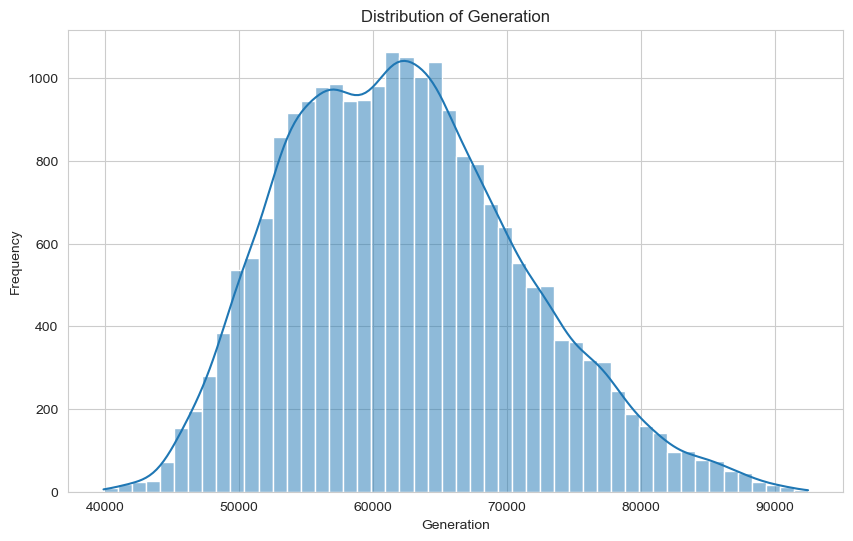

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set_style("whitegrid")

# 'Generation'의 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(data['Generation'], kde=True, bins=50)
plt.title('Distribution of Generation')
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.show()


## 상관관계 파악

In [60]:
# 컬럼 이름에 공백 제거
data.columns = [col.strip() for col in data.columns]

# 다시 상관관계 계산
correlations = {}

for city in cities:
    cols = [f"{city}_Temp", f"{city}_Precipitation", f"{city}_Humidity", 
            f"{city}_Insolation", f"{city}_Cloud", "Generation"]
    correlations[city] = data[cols].corr()["Generation"].drop("Generation")

correlations_df = pd.DataFrame(correlations)

correlations_df


,Incheon,Busan,Gwangju,Daejeon,Daegu,Seoul
Busan_Cloud,NaN,-0.064422,NaN,NaN,NaN,NaN
Busan_Humidity,NaN,-0.173285,NaN,NaN,NaN,NaN
Busan_Insolation,NaN,0.115780,NaN,NaN,NaN,NaN
Busan_Precipitation,NaN,0.037387,NaN,NaN,NaN,NaN
Busan_Temp,NaN,-0.068046,NaN,NaN,NaN,NaN
Daegu_Cloud,NaN,NaN,NaN,NaN,-0.035610,NaN
Daegu_Humidity,NaN,NaN,NaN,NaN,-0.253427,NaN
Daegu_Insolation,NaN,NaN,NaN,NaN,0.132950,NaN
Daegu_Precipitation,NaN,NaN,NaN,NaN,-0.031208,NaN
Daegu_Temp,NaN,NaN,NaN,NaN,-0.048235,NaN


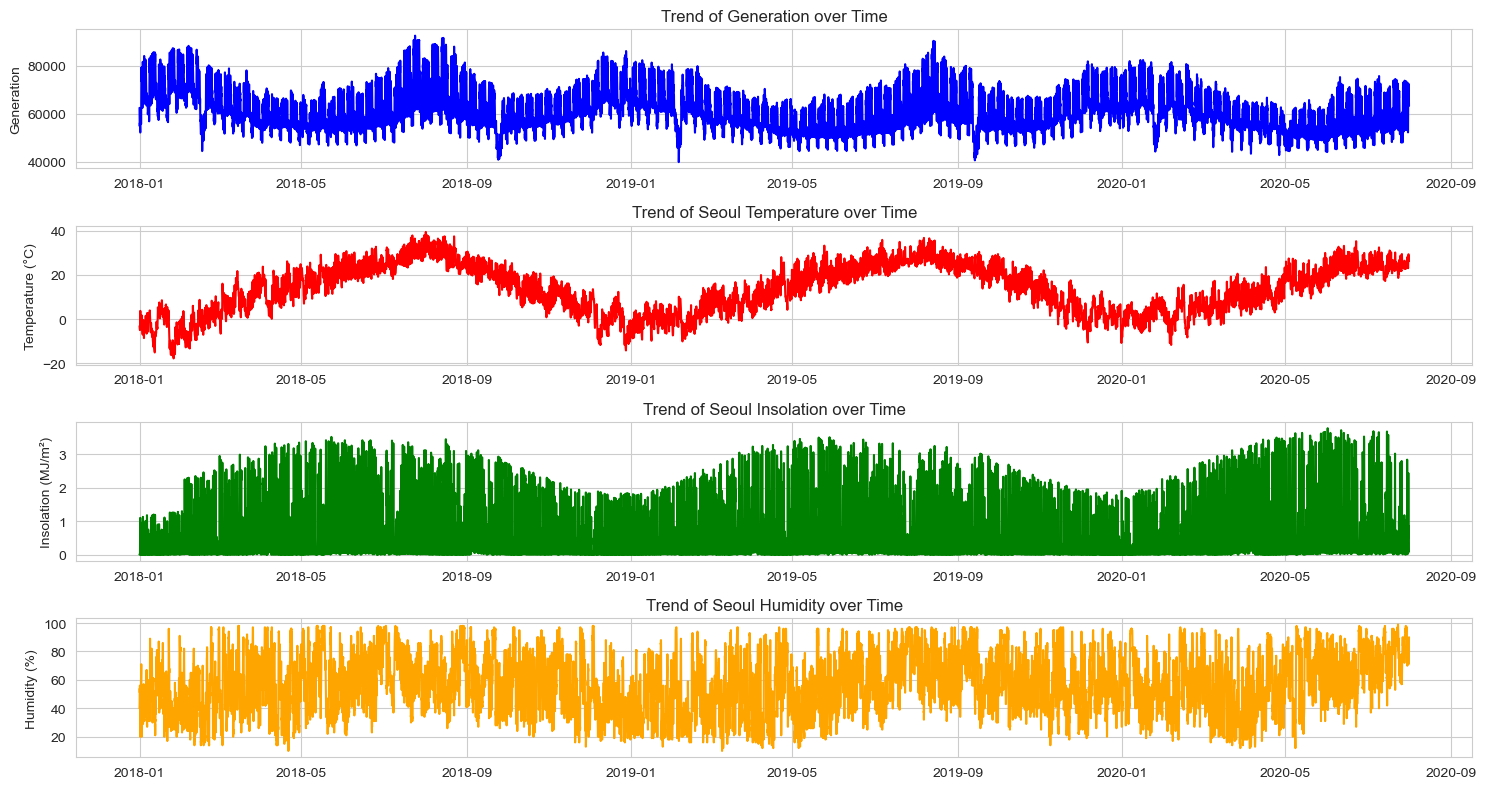

In [61]:
# Time 컬럼을 datetime 형태로 변환
data['Time'] = pd.to_datetime(data['Time'])

# 시간에 따른 'Generation', 'Seoul_Temp', 'Seoul_Insolation', 'Seoul_Humidity' 추세 확인
plt.figure(figsize=(15, 8))

# Generation 추세
plt.subplot(4, 1, 1)
plt.plot(data['Time'], data['Generation'], label='Generation', color='blue')
plt.title('Trend of Generation over Time')
plt.ylabel('Generation')

# Seoul_Temp 추세
plt.subplot(4, 1, 2)
plt.plot(data['Time'], data['Seoul_Temp'], label='Seoul_Temp', color='red')
plt.title('Trend of Seoul Temperature over Time')
plt.ylabel('Temperature (°C)')

# Seoul_Insolation 추세
plt.subplot(4, 1, 3)
plt.plot(data['Time'], data['Seoul_Insolation'], label='Seoul_Insolation', color='green')
plt.title('Trend of Seoul Insolation over Time')
plt.ylabel('Insolation (MJ/m²)')

# Seoul_Humidity 추세
plt.subplot(4, 1, 4)
plt.plot(data['Time'], data['Seoul_Humidity'], label='Seoul_Humidity', color='orange')
plt.title('Trend of Seoul Humidity over Time')
plt.ylabel('Humidity (%)')

plt.tight_layout()
plt.show()


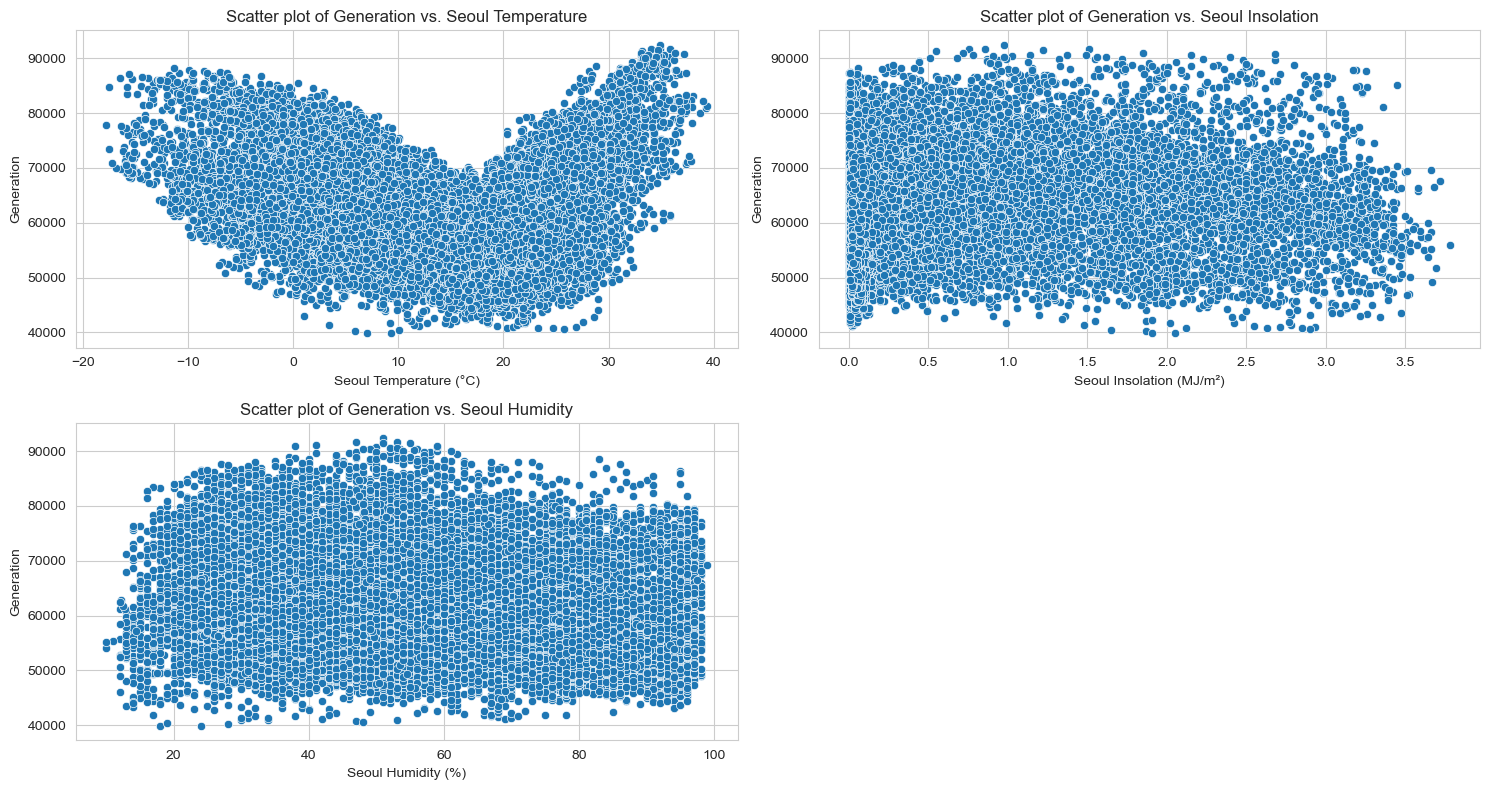

In [62]:
# 'Generation'과 몇몇 주요 기상 변수들 간의 산점도 확인
plt.figure(figsize=(15, 8))

# Generation vs. Seoul_Temp
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Seoul_Temp'], y=data['Generation'])
plt.title('Scatter plot of Generation vs. Seoul Temperature')
plt.xlabel('Seoul Temperature (°C)')
plt.ylabel('Generation')

# Generation vs. Seoul_Insolation
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Seoul_Insolation'], y=data['Generation'])
plt.title('Scatter plot of Generation vs. Seoul Insolation')
plt.xlabel('Seoul Insolation (MJ/m²)')
plt.ylabel('Generation')

# Generation vs. Seoul_Humidity
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Seoul_Humidity'], y=data['Generation'])
plt.title('Scatter plot of Generation vs. Seoul Humidity')
plt.xlabel('Seoul Humidity (%)')
plt.ylabel('Generation')

plt.tight_layout()
plt.show()


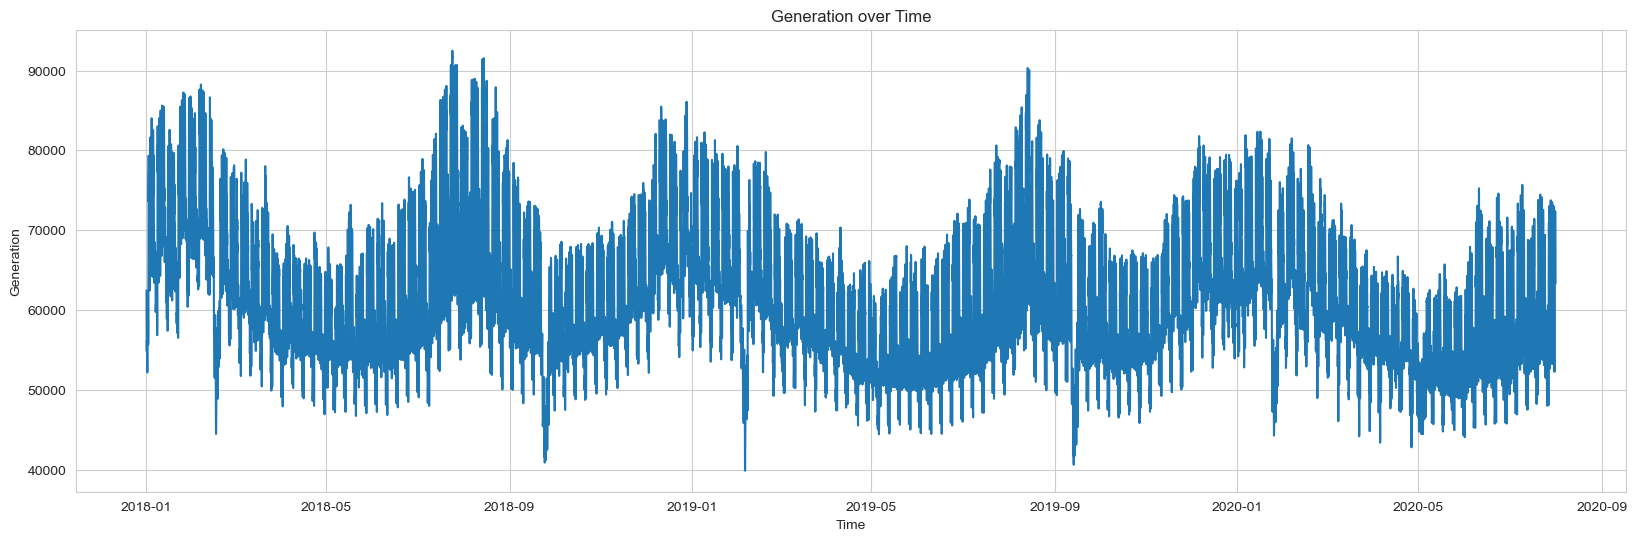

In [63]:
# 시간에 따른 Generation의 변화
plt.figure(figsize=(20, 6))
data['Time'] = pd.to_datetime(data['Time'])
sns.lineplot(x=data['Time'], y=data['Generation'])
plt.title('Generation over Time')
plt.xlabel('Time')
plt.ylabel('Generation')
plt.show()


In [64]:
# 시간 관련 특성 생성
data['Hour'] = data['Time'].dt.hour
data['DayOfWeek'] = data['Time'].dt.dayofweek
data['Month'] = data['Time'].dt.month
data['Year'] = data['Time'].dt.year

# 생성된 특성 확인
data[['Hour', 'DayOfWeek', 'Month', 'Year']].head()


,Hour,DayOfWeek,Month,Year
0,0,0,1,2018
1,1,0,1,2018
2,2,0,1,2018
3,3,0,1,2018
4,4,0,1,2018


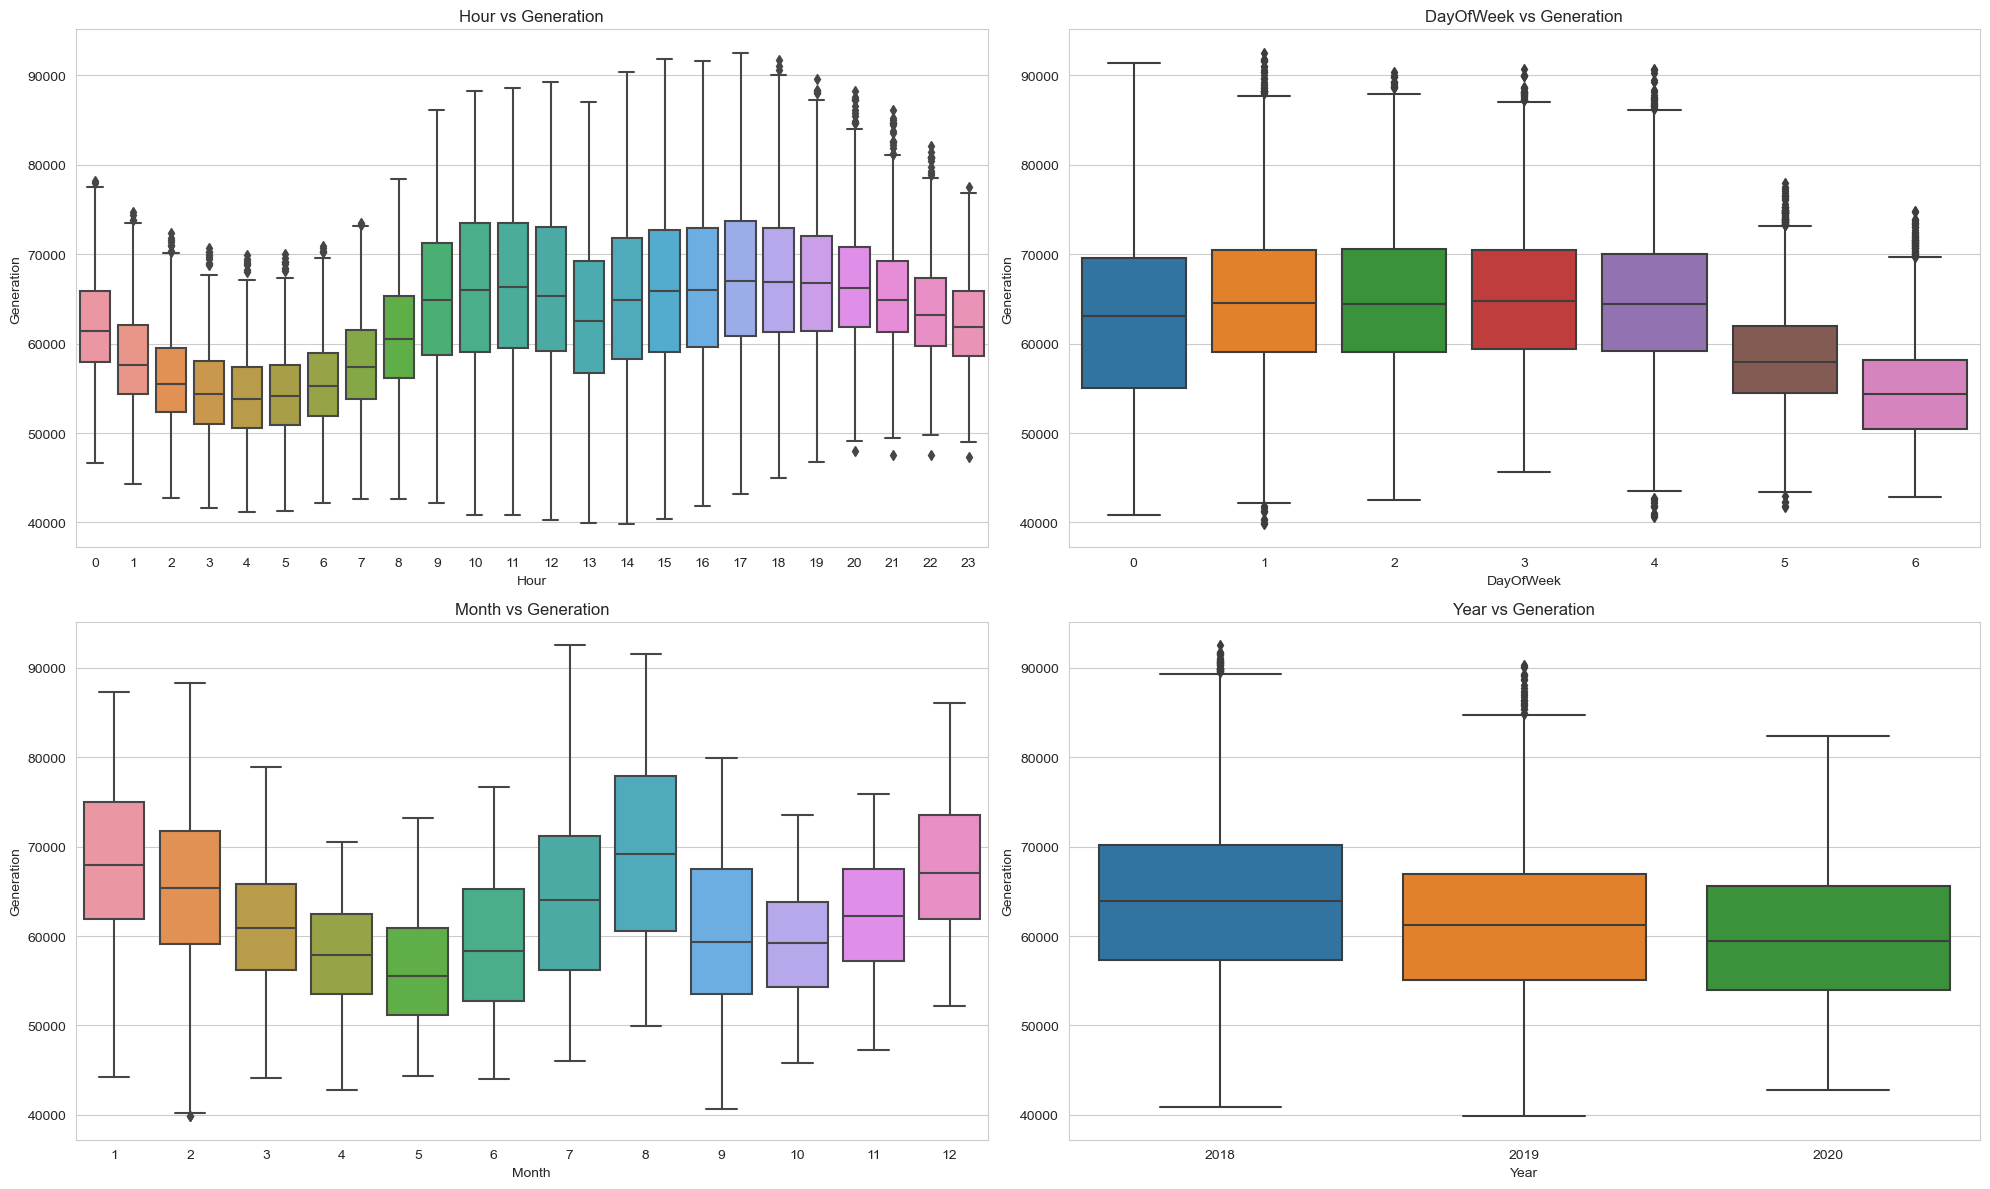

In [65]:
# 시간 관련 특성과 Generation 간의 관계 시각화
plt.figure(figsize=(20, 12))

# 시간별 Generation
plt.subplot(2, 2, 1)
sns.boxplot(x=data['Hour'], y=data['Generation'])
plt.title('Hour vs Generation')

# 요일별 Generation
plt.subplot(2, 2, 2)
sns.boxplot(x=data['DayOfWeek'], y=data['Generation'])
plt.title('DayOfWeek vs Generation')

# 월별 Generation
plt.subplot(2, 2, 3)
sns.boxplot(x=data['Month'], y=data['Generation'])
plt.title('Month vs Generation')

# 연도별 Generation
plt.subplot(2, 2, 4)
sns.boxplot(x=data['Year'], y=data['Generation'])
plt.title('Year vs Generation')

plt.tight_layout()
plt.show()
